## Importing Libraries

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt

# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation

# To generate the for loops
import glob
import os
from matplotlib import ticker

## Reading the data

In [2]:
# Get the data
folder = "/Users/yoddmena/Downloads/Research/Telemetry_edited/"

files = glob.glob( folder + "Ex *.xlsx" ) 

minutes = []
temp = []

k = 0
for file in files:
    k = k +1
    if k > 2:
        break
    df = pd.read_excel(file) # reading the excel file
    
    file_min = df.iloc[:,0] #getting only the minutes
    file_temp = df.iloc[:,3::2] # slicing the data for only temperature
    
    minutes.append(file_min) # adding minutes into the list
    temp.append(file_temp) # adding the file into the list
  
     

## SVM for each dataset

AttributeError: 'numpy.ndarray' object has no attribute 'clear'

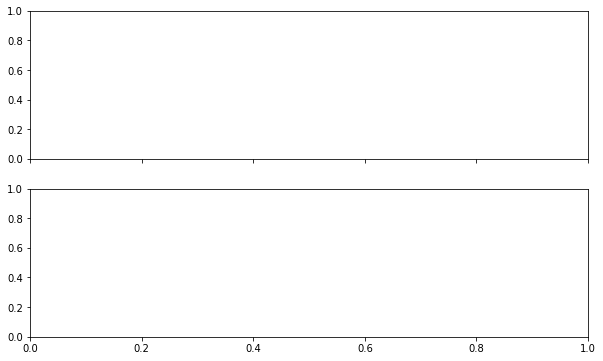

In [17]:
fig,ax = plt.subplots(2,1,figsize=(10,6), sharex = True)
fig.set_facecolor("white") # Changing the border to white

model = svm.OneClassSVM() # importing the model

# Sigmoid Definition
def sigmoid(scores, beta):
    return 1 / (1 + np.exp(-beta * scores))

beta = 0.5

# Plotting each file's temperature vs. minutes
for i in range(len(minutes)):
    mouse_min = minutes[i] # renaming the minutes to the current column
    mouse_temp = temp[i] # renaming the temperature to the current column
    x_axis = mouse_min # defining the x axis
    
    # A for loop for the temperatures (extracting only the column of data frame)
    for j in range(mouse_temp.shape[1]): 
        ax.clear() # clear axis for each individual mouse
        y_axis = mouse_temp.iloc[:,j] # defining the y axis
        names = mouse_temp.columns[j] # extracting the names of the columns (mouse name)
        
        # Filling in missing values using forward fill
        y1_fw = y_axis.fillna(method='ffill')
        y1_bw = y1_fw.fillna(method='bfill') #backward fill
        
        # Extracting column names
        #names = mouse_temp.columns[j] #doubled
        
        # Time Delay Embedding
        Y = tde.tde(y1_bw) #using the tde file
        Y = Y.T #transporting the data
        
        # Fit the Data
        model.fit(Y[:4321,:]) #training the data for the first 3 days (3*24*60)
                                ###starts on 720 b/c of the tde
                                ###need to change the ending value for Y
        # Predict the Data
        predict = model.predict(Y[4321:,:]) #predicting on the rest of the days
        scores = model.score_samples(Y[4321:,:]) #scoring on the rest of the days 
        
        # Plotting the Scatterplot
        ax[0].plot(x_axis[5041:],scores, label=names)
        ax[0].grid()
        ax[0].set_title("Scoring") # setting a title
        #ax[0].set_xlabel("Minutes") # x label
        ax[0].set_ylabel("Score") # y label
        ax[0].legend() # name of the mouse
        #ax[0].set_xlim(-5,) # x limits
        #ax[0].set_ylim(-50,) # y limits
        
        # Values between 0 and 1 using sigmoid
        y = sigmoid(beta, scores)
        ax[1].plot(x_axis[5041:], y)
        ax[1].set_xlabel('Minutes')
        ax[1].set_ylabel('Sigmoid(scores)')
        ax[1].set_title('Between 0 and 1')
        
        fig.tight_layout()
        fig.show()
        
        #SAVING EACH PLOT
        filename = "Scores/%s.png"%names # saving the file as the name of the mouse
        fig.savefig(filename)
        print("Prediction for " + names, "is: \n", predict, "\n with score \n ", +  scores)